<a href="https://colab.research.google.com/github/aaron-v-kane/Tareas_EstadisticaAplicada_15/blob/main/AVK_1848627_EstadisticaAplicadaG51_tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3
Estadística Aplicada_G51

Aarón Villegas Kane 1848627


In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 9.1 MB/s 
     |████████████████████████████████| 63 kB 829 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Importar las librerias o paquetes a utilizar

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
walmex = yf.download('WALMEX.MX', start = '2014-01-01', end = '2017-12-31', progress = False)

In [4]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,34.290001,34.389999,33.189999,33.419998,26.425304,12895411
2014-01-03,33.509998,33.590000,33.160000,33.250000,26.290886,8764140
2014-01-06,33.580002,33.590000,32.599998,32.849998,25.974602,10102481
2014-01-07,32.930000,33.549999,32.810001,33.380001,26.393675,18559062
2014-01-08,33.439999,33.570000,32.860001,32.889999,26.006231,17925028


In [5]:
walmex.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,46.400002,46.500000,45.869999,46.009998,42.662651,5321344
2017-12-26,45.900002,46.389999,45.770000,45.950001,42.607018,10207072
2017-12-27,46.180000,46.889999,46.180000,46.810001,43.404449,7449128
2017-12-28,46.810001,47.290001,46.169998,47.189999,43.756790,5411119
2017-12-29,47.290001,48.500000,47.110001,48.189999,44.684052,11568658


In [6]:
walmex.rename(columns = {'Adj Close' : 'adj_close'}, inplace = True)

In [7]:
walmex.head()

,Open,High,Low,Close,adj_close,Volume
Date,,,,,,
2014-01-02,34.290001,34.389999,33.189999,33.419998,26.425304,12895411
2014-01-03,33.509998,33.590000,33.160000,33.250000,26.290886,8764140
2014-01-06,33.580002,33.590000,32.599998,32.849998,25.974602,10102481
2014-01-07,32.930000,33.549999,32.810001,33.380001,26.393675,18559062
2014-01-08,33.439999,33.570000,32.860001,32.889999,26.006231,17925028


Calculamos el retorno de la acción

In [8]:
walmex['retorno_simple'] = walmex.adj_close.pct_change()

In [9]:
walmex.head()

,Open,High,Low,Close,adj_close,Volume,retorno_simple
Date,,,,,,,
2014-01-02,34.290001,34.389999,33.189999,33.419998,26.425304,12895411,NaN
2014-01-03,33.509998,33.590000,33.160000,33.250000,26.290886,8764140,-0.005087
2014-01-06,33.580002,33.590000,32.599998,32.849998,25.974602,10102481,-0.012030
2014-01-07,32.930000,33.549999,32.810001,33.380001,26.393675,18559062,0.016134
2014-01-08,33.439999,33.570000,32.860001,32.889999,26.006231,17925028,-0.014679


In [10]:
print('Rango de fechas', min(walmex.index.date),'-', max(walmex.index.date))
print('Número de observaciones:', walmex.shape[0])
print(f'La media de los retornos es:, {walmex.retorno_simple.mean():.4f}')
print(f'skewness (simetria):{walmex.retorno_simple.skew():.4f}')
print(f'kurtosis: {walmex.retorno_simple.kurtosis():.4f}')

Rango de fechas 2014-01-02 - 2017-12-29
Número de observaciones: 1005
La media de los retornos es:, 0.0006
skewness (simetria):0.2433
kurtosis: 3.6359


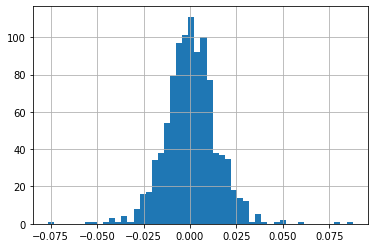

In [11]:
walmex['retorno_simple'].hist(bins = 50);

Intervalo de confianza del 90% para el rendimiento promedio de las acciones de walmart México

In [17]:
media_muestral = walmex.retorno_simple.mean()
n = walmex.shape[0]
raiz_n = n**0.5
desv_est_muestral = walmex.retorno_simple.std(ddof=1)
gl_t = n - 1

In [13]:
alfa = 0.10
confianza = 1 - alfa

In [14]:
from scipy.stats.distributions import t as tdist
t_alfa_izquierda = tdist.ppf(alfa/2, gl_t)
t_alfa_derecha = (tdist.ppf(alfa/2, gl_t)) * -1

CONSTRUIR EL INTERVALO DE CONFIANZA AL 90% DE CONFIANZA

In [18]:
limite_inferior = media_muestral + t_alfa_izquierda *(desv_est_muestral/raiz_n)
limite_superior = media_muestral + t_alfa_derecha *(desv_est_muestral/raiz_n)
print('el intervalo de confiansza al 0.10 de significancia es', round(limite_inferior, 4), '-', round(limite_superior, 4))

el intervalo de confiansza al 0.10 de significancia es -0.0001 - 0.0014
